### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
gpp= pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gpp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
gpp.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gpp.shape

(907, 27)

In [6]:
gpp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are 12 objects and 16 numerical columns in data

We need to remove some columns that having maximum number of null values because if we fill those values, prediction will not be correct.

In [8]:
gpp.drop(['estimated_generation_gwh', 'generation_gwh_2019', 'generation_gwh_2013', 'wepp_id', 'other_fuel3', 'other_fuel2', 'other_fuel1'], axis=1, inplace= True)

In [9]:
gpp.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

Removing unwanted columns

In [10]:
gpp.drop(['gppd_idnr', 'owner', 'generation_data_source', 'name', 'url'], axis=1, inplace= True)

In [11]:
gpp.isnull().sum()

country                    0
country_long               0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [12]:
gpp.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [13]:
gpp['year_of_capacity_data'].nunique()

1

We will remove year_of_capacity_data because it has only 1 unique value

In [14]:
gpp.drop(['year_of_capacity_data'], axis=1, inplace= True)

In [15]:
gpp['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [16]:
# Filling geological source with mode because category data
gpp['geolocation_source'].fillna(gpp['geolocation_source'].mode()[0], inplace= True)

In [17]:
# Filling bull values with median in numerical columns
gpp.fillna(gpp.median()[0], inplace= True)

In [18]:
gpp.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Here we can see that all the null values has been removed.

In [19]:
gpp['source'].nunique()

191

In [20]:
gpp['geolocation_source'].nunique()

3

In [21]:
gpp['country'].nunique()

1

Also dropping the columns 'country' and 'country_long' because having one country name only, it will be of no help in predictions

In [22]:
gpp.drop(['country', 'country_long'], axis=1, inplace= True)

In [23]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

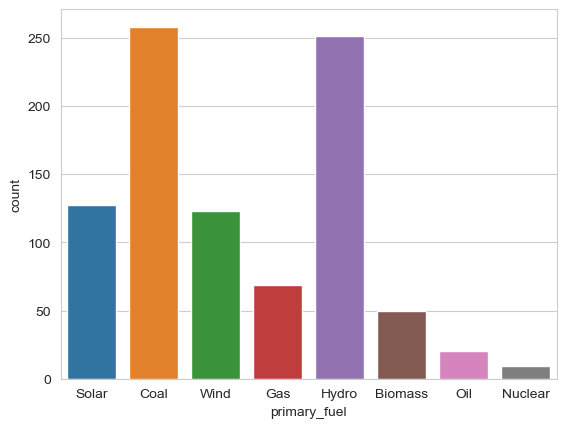

In [24]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data= gpp)

# EDA

In [25]:
gpp.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.200000,59.200,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,Coal,59.2,Ultratech Cement ltd,WRI,59.200000,59.200,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,Wind,59.2,CDM,WRI,59.200000,59.200,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [26]:
gpp.corr= gpp.corr()

<AxesSubplot:>

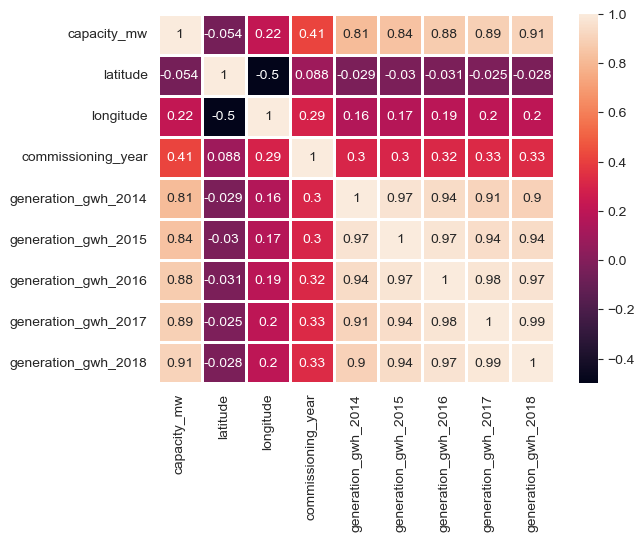

In [27]:
sns.heatmap(gpp.corr, annot= True, linewidth=1)

Here we can see that generation_gwh_2014, 2015, 2016, 2017, 2018 are positively correlated to capacity_mw and lalitude is negatively correlated.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

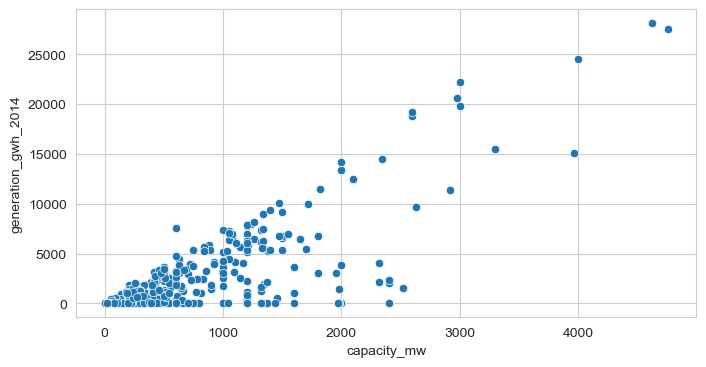

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw', y='generation_gwh_2014', data= gpp)

We can notice here as electicity generation in gigawatt-hour increasing also increasing the number of electrical generating cpacity in megawatts in 2014.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

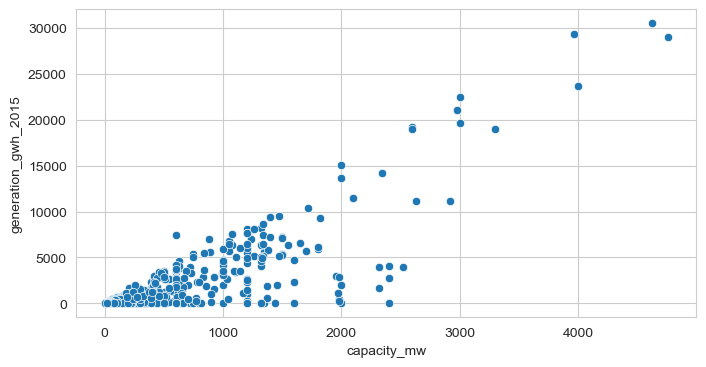

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw', y='generation_gwh_2015', data= gpp)

We can notice here as electicity generation in gigawatt-hour increasing also increasing the number of electrical generating cpacity in megawatts in 2015.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

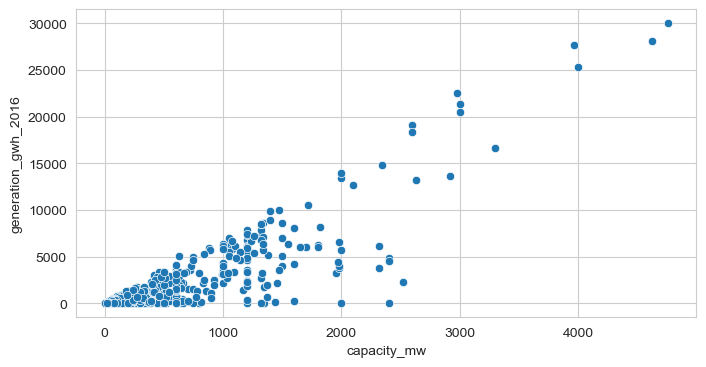

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw', y='generation_gwh_2016', data= gpp)

We can notice here as electicity generation in gigawatt-hour increasing also increasing the number of electrical generating cpacity in megawatts in 2016.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

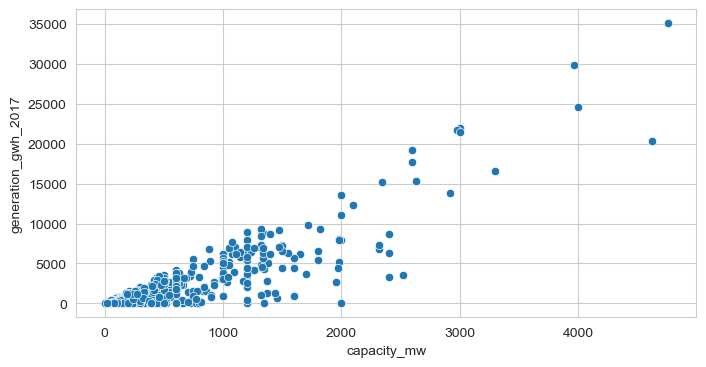

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw', y='generation_gwh_2017', data= gpp)

We can notice here as electicity generation in gigawatt-hour increasing also increasing the number of electrical generating cpacity in megawatts in 2017.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

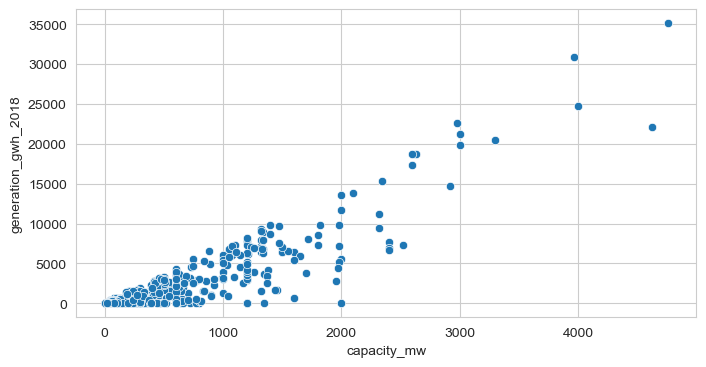

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw', y='generation_gwh_2018', data= gpp)

We can notice here as electicity generation in gigawatt-hour increasing also increasing the number of electrical generating cpacity in megawatts in 2018.

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

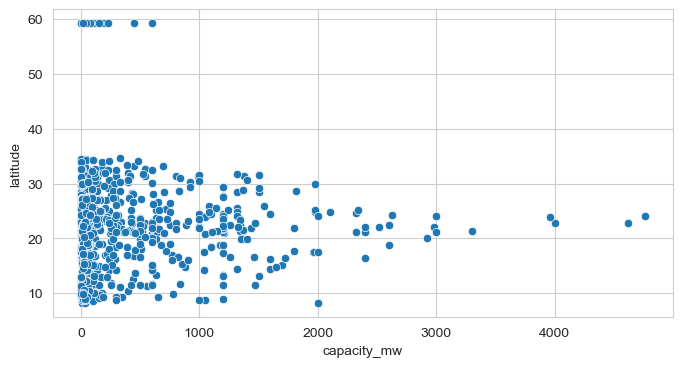

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw', y='latitude', data= gpp)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

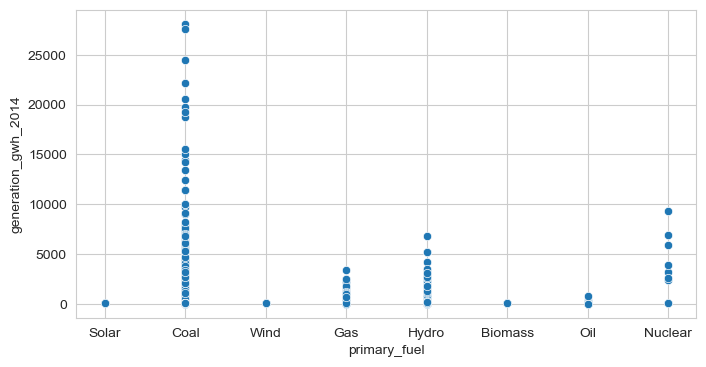

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2014', data= gpp)

We can here the coal is most used fuel in 2014 and Nuclear, Gas and Hydro on avg use and solar, Wind, Biomass and Oil was very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

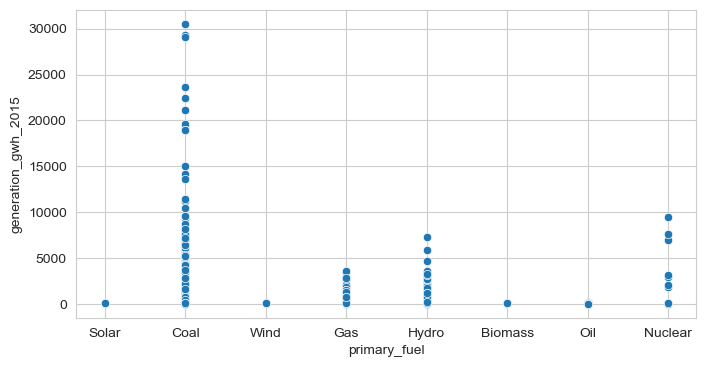

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2015', data= gpp)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

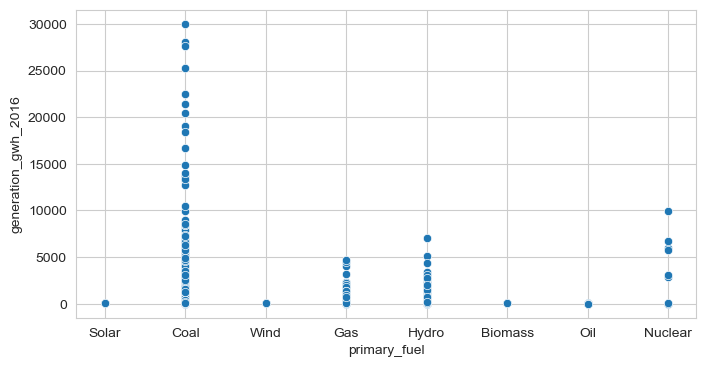

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2016', data= gpp)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

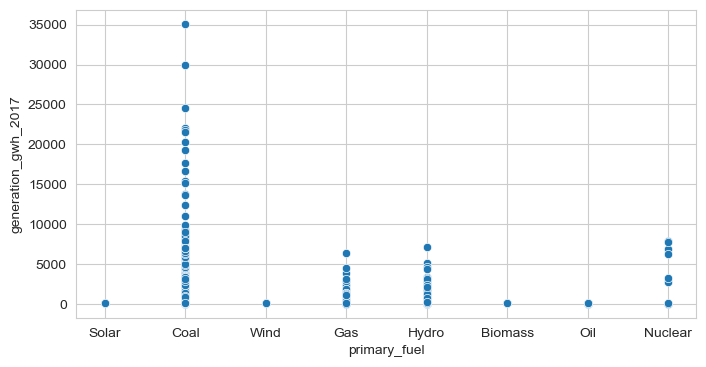

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2017', data= gpp)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

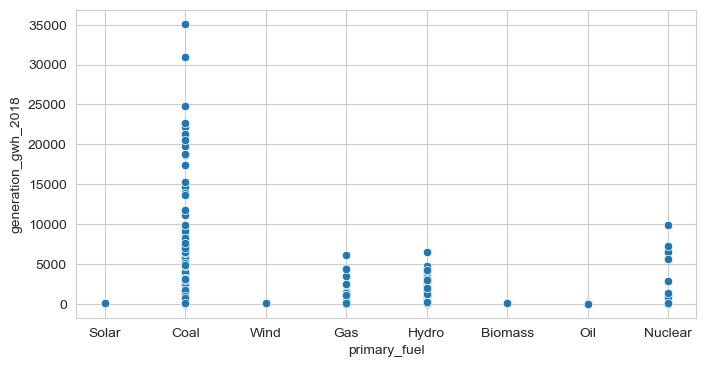

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2018', data= gpp)

In all of the years from 2014 to 2018, the coal is used fuel.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

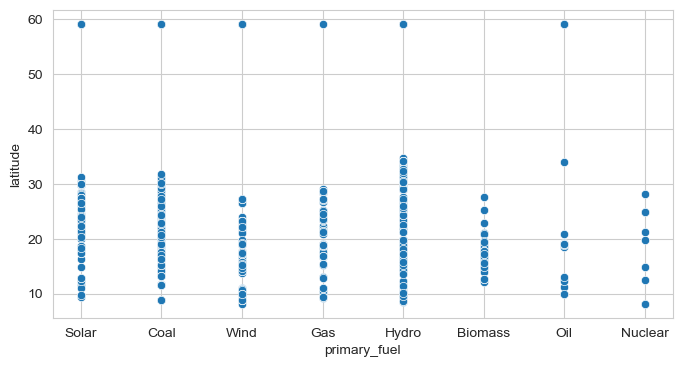

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel', y='latitude', data= gpp)

### Using LabelEncoder for converting categorical to numerical

In [40]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [41]:
gpp['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [42]:
gpp['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
gpp['primary_fuel']= le.fit_transform(gpp['primary_fuel'])
gpp['geolocation_source']= le.fit_transform(gpp['geolocation_source'])
gpp['source']= le.fit_transform(gpp['source'])

In [44]:
gpp['geolocation_source'].unique()

array([1, 2, 0])

### REMOVING OUTLIERS

## ZSCORE

In [45]:
z= np.abs(zscore(gpp[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 482, 493, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 494, 532, 623, 648, 648, 648,
       648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880, 880],
      dtype=int64), array([1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [46]:
z= np.abs(zscore(gpp[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'capacity_mw']]))
threshold=3
gpp1= gpp[(z<3).all(axis=1)]

print("Shape of the dataframe before removing outliers: ", gpp.shape)
print("Shape of the dataframe after removing outliers: ", gpp1.shape)
print("Percentage of data loss post outliers removal: ", (gpp.shape[0]-gpp1.shape[0])/gpp.shape[0]*100)

# Reassinging the changed dataframe to the original dataframe
gpp= gpp1.copy()

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (882, 12)
Percentage of data loss post outliers removal:  2.7563395810363835


In [47]:
gpp.shape

(882, 12)

## SKEWNESS

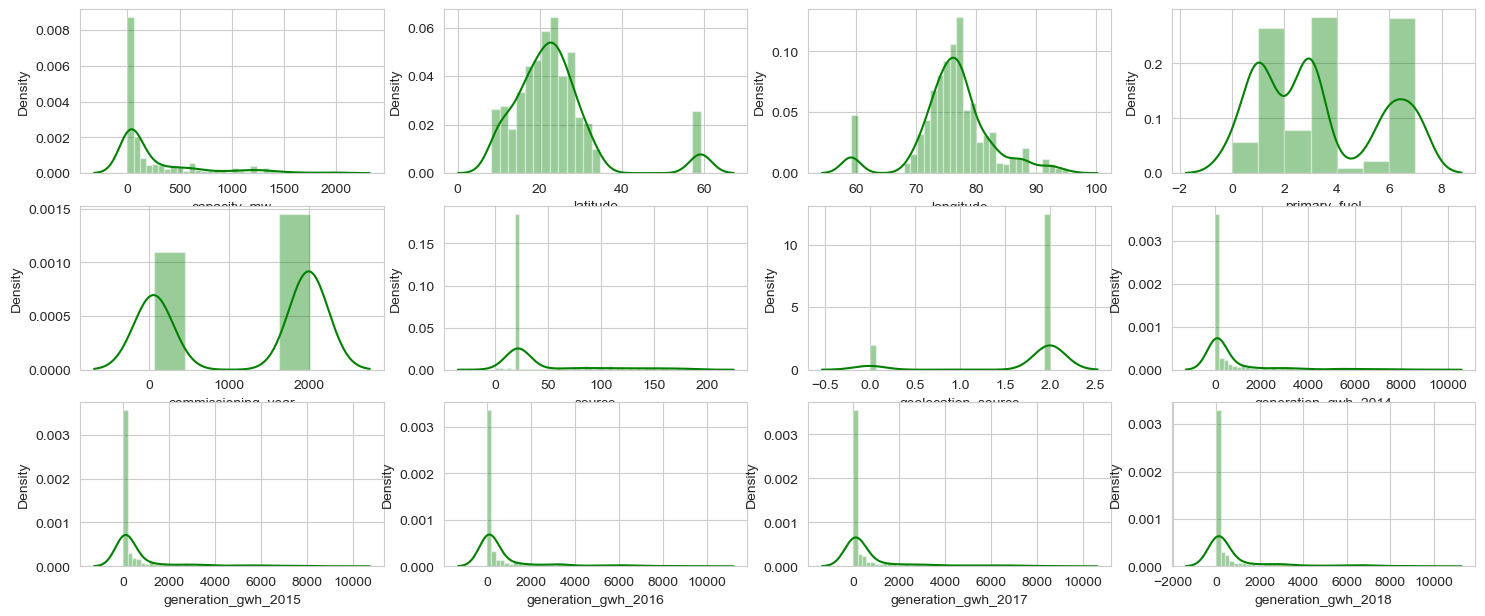

In [48]:
plt.figure(figsize=(18,20))
for i in enumerate(gpp):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(gpp[i[1]], color='g')

In [49]:
gpp.skew()

capacity_mw            2.054665
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
generation_gwh_2018    2.615528
dtype: float64

In [50]:
pd.DataFrame(gpp).isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

### 1. Taking 'capacity_mw' as target creating Regression model

### Diving data into X & Y

In [51]:
x= gpp.drop(['capacity_mw'], axis=1)
y= gpp['capacity_mw']

In [52]:
x.shape

(882, 11)

In [53]:
y.shape

(882,)

### Scaling X values

In [54]:
sc= MinMaxScaler()
x= sc.fit_transform(x)

In [55]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [56]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.293848,0.475981,0.466958,0.562984,0.234037,0.862812,0.081043,0.083716,0.084548,0.094683,0.091333
std,0.204767,0.173376,0.325982,0.490143,0.237462,0.342589,0.173033,0.174021,0.172960,0.191004,0.184717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172280,0.401798,0.142857,0.000000,0.115789,1.000000,0.006342,0.006263,0.005988,0.006385,0.006004
50%,0.274085,0.475058,0.428571,0.978048,0.115789,1.000000,0.006342,0.006263,0.005988,0.006385,0.006004
75%,0.365181,0.549905,0.857143,0.991832,0.188158,1.000000,0.048437,0.051690,0.048640,0.058863,0.059481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 Data have been scaled

## MODEL BUILDING

### LINEAR REGRESSION

In [63]:
# Checking the best random state

lr= LinearRegression()

for i in range(0,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    lr_predict_train= lr.predict(x_train)
    lr_predict_test= lr.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train, lr_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test, lr_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.7371343694969148
At random state 0, The test accuracy is: 0.7785562748322528


At random state 1, The training accuracy is: 0.7363732472807598
At random state 1, The test accuracy is: 0.7825703301177083


At random state 2, The training accuracy is: 0.7695941153746326
At random state 2, The test accuracy is: 0.6465841680621657


At random state 3, The training accuracy is: 0.7419559645164441
At random state 3, The test accuracy is: 0.7320805390372324


At random state 4, The training accuracy is: 0.738738279059849
At random state 4, The test accuracy is: 0.773301903306123


At random state 5, The training accuracy is: 0.7250667084833813
At random state 5, The test accuracy is: 0.8275414608769627


At random state 6, The training accuracy is: 0.7141468059435383
At random state 6, The test accuracy is: 0.8357829540367204


At random state 7, The training accuracy is: 0.7547349077263668
At random state 7, The test accuracy is: 0.7060863185988

Random State= 95 giving highest accuracy rate, choosing that as random state.

In [64]:
# Splitting the data 
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.27, random_state=95)

In [65]:
x_train.shape

(643, 11)

In [66]:
x_test.shape

(239, 11)

In [67]:
y_train.shape

(643,)

In [68]:
y_test.shape

(239,)

In [69]:
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
lr_predict= lr.predict(x_test)

0.7259531961103344


In [70]:
print('MSE:', mean_squared_error(lr_predict, y_test))
print('MAE:', mean_absolute_error(lr_predict, y_test))
print('r2_score:', r2_score(lr_predict, y_test))

MSE: 28041.664937744372
MAE: 114.97052993422868
r2_score: 0.7699949200783783


### RIDGE

In [71]:
r= Ridge()
r.fit(x_train, y_train)
print(r.score(x_train, y_train))
r_predict= r.predict(x_test)

0.7248905035076589


In [72]:
print('MSE:', mean_squared_error(r_predict, y_test))
print('MAE:', mean_absolute_error(r_predict, y_test))
print('r2_score:', r2_score(r_predict, y_test))

MSE: 27483.1866707442
MAE: 114.50788369558427
r2_score: 0.7665440363636685


### SVR

#### Kernel= 'Linear'

In [73]:
svr= SVR(kernel='linear')
svr.fit(x_train, y_train)
print(svr.score(x_train, y_train))
svr_predict= svr.predict(x_test)

0.09199944192571718


In [74]:
print('MSE:', mean_squared_error(svr_predict, y_test))
print('MAE:', mean_absolute_error(svr_predict, y_test))
print('r2_score:', r2_score(svr_predict, y_test))

MSE: 118198.142249002
MAE: 175.30933786184724
r2_score: -19.534649254878204


#### Kernel= 'Poly'

In [75]:
svr_p= SVR(kernel='poly')
svr_p.fit(x_train, y_train)
print(svr_p.score(x_train, y_train))
svrpred_p= svr_p.predict(x_test)

0.5743297635986613


In [76]:
print('MSE:', mean_squared_error(svrpred_p, y_test))
print('MAE:', mean_absolute_error(svrpred_p, y_test))
print('r2_score:', r2_score(svrpred_p, y_test))

MSE: 37894.8569546334
MAE: 101.61477396805591
r2_score: 0.41646821662471656


#### Kernel= 'rbf'

In [83]:
svr_r= SVR(kernel='rbf')
svr_r.fit(x_train, y_train)
print(svr_r.score(x_train, y_train))
svrpred_r= svr_r.predict(x_test)

-0.07260698245401609


In [84]:
print('MSE:', mean_squared_error(svrpred_r, y_test))
print('MAE:', mean_absolute_error(svrpred_r, y_test))
print('r2_score:', r2_score(svrpred_r, y_test))

MSE: 143632.7441782382
MAE: 188.2140470123138
r2_score: -71.60563099173544


## RANDOM FOREST REGRESSOR

In [77]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
rf_predict= rf.predict(x_test)

0.966739730317011


In [78]:
print('MSE:', mean_squared_error(rf_predict, y_test))
print('MAE:', mean_absolute_error(rf_predict, y_test))
print('r2_score:', r2_score(rf_predict, y_test))

MSE: 24299.539558199715
MAE: 85.26718016398976
r2_score: 0.8296693363859077


## DECISION TREE REGRESSOR

In [79]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)
print(dtr.score(x_train, y_train))
dtr_predict= dtr.predict(x_test)

0.9998772628097563


In [80]:
print('MSE:', mean_squared_error(dtr_predict, y_test))
print('MAE:', mean_absolute_error(dtr_predict, y_test))
print('r2_score:', r2_score(dtr_predict, y_test))

MSE: 62858.85416052998
MAE: 120.34673640167364
r2_score: 0.6749469569825983


## GRADIENT BOOSTING REGRESSOR

In [81]:
gbr= GradientBoostingRegressor()
gbr.fit(x_train, y_train)
print(gbr.score(x_train, y_train))
gbr_predict= gbr.predict(x_test)

0.9639120765444308


In [82]:
print('MSE:', mean_squared_error(gbr_predict, y_test))
print('MAE:', mean_absolute_error(gbr_predict, y_test))
print('r2_score:', r2_score(gbr_predict, y_test))

MSE: 30236.299129839754
MAE: 91.8698687889197
r2_score: 0.798492121618386


## CROSS VALIDATION

In [87]:
np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =- (cross_val_score(model, x,y, scoring= 'neg_mean_squared_error', cv=10))
    return(rmse)

models= [LinearRegression(), Ridge(), SVR(kernel='linear'), SVR(kernel='poly'), SVR(kernel='rbf'), RandomForestRegressor(), DecisionTreeRegressor(), GradientBoostingRegressor()]

names= ['lr', 'r', 'svr', 'svr_p', 'svr_r', 'rf', 'dtr', 'gbr']
for model, name in zip(models,names):
    score= rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(), score.std()))

lr    : 46926.493565, 20308.734900
r    : 45440.456598, 20232.644750
svr    : 146367.436407, 54389.803777
svr_p    : 63378.956231, 29198.434944
svr_r    : 176652.061047, 64111.746985
rf    : 39137.653156, 21514.898890
dtr    : 69668.269221, 16468.683014
gbr    : 42939.630629, 23625.793352


## HYPER PARAMETER TUNING

### GRID SEARCH CV

In [89]:
# With GradientBoostingRegressor
GF= GradientBoostingRegressor()
param= {'criterion':['mse', 'mae'], 'n_estimators':[100, 200],}

In [90]:
GF_grid= GridSearchCV(RandomForestRegressor(), param, cv=10, scoring= 'accuracy', n_jobs=-1, verbose=2)

In [91]:
GF_grid.fit(x_train, y_train)
GF_grid_pred= GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [92]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [94]:
print('MSE:', mean_squared_error(GF_grid_pred, y_test))
print('MAE:', mean_absolute_error(GF_grid_pred, y_test))
print('r2_score:', r2_score(GF_grid_pred, y_test))

MSE: 24353.51504381891
MAE: 86.27195064957498
r2_score: 0.8240457567711477


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

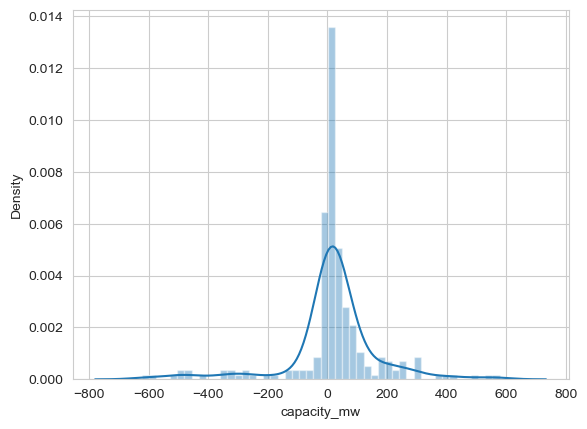

In [95]:
sns.distplot(GF_grid_pred-y_test)

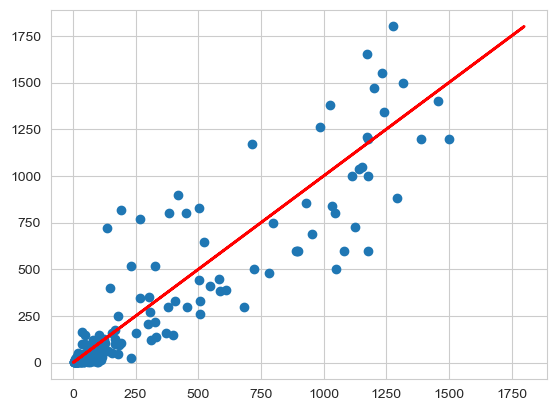

In [96]:
plt.scatter(GF_grid_pred, y_test)
plt.plot(y_test, y_test, linewidth=2, color='r')

### Saving the Model

In [97]:
import joblib

In [98]:
joblib.dump(GF_grid.best_estimator_,'Global Power Plant Database Regression.obj')

['Global Power Plant Database Regression.obj']

### Taking 'primary_fuel' as target, creating Classification Model

#### Dividing data into X & Y

In [99]:
x= gpp.drop(['primary_fuel'], axis=1)
y= gpp['primary_fuel']

In [100]:
x.shape

(882, 11)

In [101]:
y.shape

(882,)

### Splitting train and test data

In [102]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.27, random_state=42)

In [103]:
x_train.shape

(643, 11)

In [104]:
x_test.shape

(239, 11)

In [105]:
y_train.shape

(643,)

In [106]:
y_test.shape

(239,)

## MODEL BUILDING

### IMPORTING LIBRARIES

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

### LOGISTIC REGRESSION

In [108]:
LR= LogisticRegression()
LR_score= cross_val_score(LR,x,y,cv=5, scoring= 'accuracy')
print("Cross validation score:", np.mean(LR_score))

Cross validation score: 0.641743708269132


In [109]:
LR.fit(x_train, y_train)
lr_predicted= LR.predict(x_test)

print(accuracy_score(y_test, lr_predicted))
print(confusion_matrix(y_test, lr_predicted))
print(classification_report(y_test, lr_predicted))
print("Training accuracy::", LR.score(x_train, y_train))
print("Test accuracy::", LR.score(x_test, y_test))

0.6527196652719666
[[ 0  1  0  0  0  0  6  3]
 [ 0 44  3 12  0  0  8  8]
 [ 0  5  1 10  0  0  1  1]
 [ 0  9  0 58  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  2  0]
 [ 0  1  0  0  0  0 24  8]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.71      0.59      0.64        75
           2       0.25      0.06      0.09        18
           3       0.70      0.87      0.77        67
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.59      0.73      0.65        33
           7       0.59      1.00      0.74        29

    accuracy                           0.65       239
   macro avg       0.35      0.40      0.36       239
weighted avg       0.59      0.65      0.60       239

Training accuracy:: 0.656298600311042
Test accuracy:: 0.6527196652719666


### DECISION TREE CLASSIFIER

In [110]:
dtc= DecisionTreeClassifier()
dtc_score= cross_val_score(dtc,x,y,cv=5, scoring= 'accuracy')
print("Cross validation score for svm:", np.mean(dtc_score))

Cross validation score for svm: 0.8072483307652799


In [111]:
dtc.fit(x_train, y_train)
predicted_dtc= dtc.predict(x_test)

print(accuracy_score(y_test, predicted_dtc))
print(confusion_matrix(y_test, predicted_dtc))
print(classification_report(y_test, predicted_dtc))
print("Training accuracy::", dtc.score(x_train, y_train))
print("Test accuracy::", dtc.score(x_test, y_test))

0.7531380753138075
[[ 8  1  0  0  0  0  1  0]
 [ 5 47  7  7  8  1  0  0]
 [ 0  6  4  6  0  2  0  0]
 [ 0  3  6 58  0  0  0  0]
 [ 0  1  2  0  0  0  0  0]
 [ 0  0  2  0  0  2  0  0]
 [ 0  1  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.80      0.63      0.70        75
           2       0.19      0.22      0.21        18
           3       0.82      0.87      0.84        67
           4       0.00      0.00      0.00         3
           5       0.40      0.50      0.44         4
           6       0.97      0.97      0.97        33
           7       1.00      1.00      1.00        29

    accuracy                           0.75       239
   macro avg       0.60      0.62      0.61       239
weighted avg       0.78      0.75      0.76       239

Training accuracy:: 1.0
Test accuracy:: 0.7531380753138075


### KNEIGHBORS CLASSIFIER

In [112]:
knn= KNeighborsClassifier()
knn_score= cross_val_score(knn,x,y,cv=5, scoring= 'accuracy')
print("Cross validation score for knn:", np.mean(knn_score))

Cross validation score for knn: 0.7278954802259886


In [113]:
knn.fit(x_train, y_train)
predicted_knn= knn.predict(x_test)

print(accuracy_score(y_test, predicted_knn))
print(confusion_matrix(y_test, predicted_knn))
print(classification_report(y_test, predicted_knn))
print("Training accuracy::", knn.score(x_train, y_train))
print("Test accuracy::", knn.score(x_test, y_test))

0.7280334728033473
[[ 5  3  0  0  0  0  1  1]
 [ 3 53  2  6  0  1  4  6]
 [ 0  8  2  6  0  1  0  1]
 [ 0  8  1 58  0  0  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  2  1  0  0  1  0  0]
 [ 4  1  0  0  0  0 26  2]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.70      0.71      0.70        75
           2       0.29      0.11      0.16        18
           3       0.82      0.87      0.84        67
           4       0.00      0.00      0.00         3
           5       0.33      0.25      0.29         4
           6       0.84      0.79      0.81        33
           7       0.74      1.00      0.85        29

    accuracy                           0.73       239
   macro avg       0.52      0.53      0.51       239
weighted avg       0.70      0.73      0.71       239

Training accuracy:: 0.8055987558320373
Test accuracy:: 0.7280334728033473


### RANDOM FOREST CLASSIFIER

In [114]:
rfc= RandomForestClassifier()
rfc_score= cross_val_score(rfc,x,y,cv=5, scoring= 'accuracy')
print("Cross validation score for rfc:", np.mean(rfc_score))

Cross validation score for rfc: 0.8492360041088854


In [115]:
rfc.fit(x_train, y_train)
predicted_rfc= rfc.predict(x_test)

print(accuracy_score(y_test, predicted_rfc))
print(confusion_matrix(y_test, predicted_rfc))
print(classification_report(y_test, predicted_rfc))
print("Training accuracy::", rfc.score(x_train, y_train))
print("Test accuracy::", rfc.score(x_test, y_test))

0.8744769874476988
[[ 8  1  0  0  0  0  0  1]
 [ 3 65  0  5  0  1  0  1]
 [ 0  6  8  2  0  1  0  1]
 [ 0  4  0 63  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.82      0.87      0.84        75
           2       0.89      0.44      0.59        18
           3       0.90      0.94      0.92        67
           4       0.00      0.00      0.00         3
           5       0.60      0.75      0.67         4
           6       1.00      1.00      1.00        33
           7       0.91      1.00      0.95        29

    accuracy                           0.87       239
   macro avg       0.73      0.73      0.72       239
weighted avg       0.87      0.87      0.86       239

Training accuracy:: 0.9984447900466563
Test accuracy:: 0.8744769874476988


### ADA BOOST CLASSIFIER

In [116]:
abc= AdaBoostClassifier()
abc_score= cross_val_score(abc,x,y,cv=5, scoring= 'accuracy')
print("Cross validation score for abc:", np.mean(abc_score))

Cross validation score for abc: 0.5363700564971751


In [117]:
abc.fit(x_train, y_train)
predicted_abc= abc.predict(x_test)

print(accuracy_score(y_test, predicted_abc))
print(confusion_matrix(y_test, predicted_abc))
print(classification_report(y_test, predicted_abc))
print("Training accuracy::", abc.score(x_train, y_train))
print("Test accuracy::", abc.score(x_test, y_test))

0.5313807531380753
[[ 0  0  0  9  0  0  0  1]
 [ 0  0  0 72  0  0  0  3]
 [ 0  0  0 18  0  0  0  0]
 [ 0  0  0 67  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  2  0  0 31  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        18
           3       0.38      1.00      0.55        67
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       1.00      0.94      0.97        33
           7       0.88      1.00      0.94        29

    accuracy                           0.53       239
   macro avg       0.28      0.37      0.31       239
weighted avg       0.35      0.53      0.40       239

Training accuracy:: 0.5754276827371695
Test accuracy:: 0.5313807531380753


### BAGGING CLASSIFIER

In [118]:
bgc= BaggingClassifier()
bgc_score= cross_val_score(bgc,x,y,cv=5, scoring= 'accuracy')
print("Cross validation score for bgc:", np.mean(bgc_score))

Cross validation score for bgc: 0.8378916281458654


In [119]:
bgc.fit(x_train, y_train)
predicted_bgc= bgc.predict(x_test)

print(accuracy_score(y_test, predicted_bgc))
print(confusion_matrix(y_test, predicted_bgc))
print(classification_report(y_test, predicted_bgc))
print("Training accuracy::", bgc.score(x_train, y_train))
print("Test accuracy::", bgc.score(x_test, y_test))

0.8075313807531381
[[ 8  2  0  0  0  0  0  0]
 [ 9 53  5  5  2  1  0  0]
 [ 0  7  7  3  0  1  0  0]
 [ 0  6  0 61  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  1  0  0  2  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.75      0.71      0.73        75
           2       0.50      0.39      0.44        18
           3       0.88      0.91      0.90        67
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.81       239
   macro avg       0.64      0.66      0.64       239
weighted avg       0.81      0.81      0.80       239

Training accuracy:: 0.9844479004665629
Test accuracy:: 0.8075313807531381


### GRADIENT BOOSTING CLASSIFIER

In [120]:
gbc= GradientBoostingClassifier()
gbc_score= cross_val_score(gbc,x,y,cv=5, scoring= 'accuracy')
print("Cross validation score for gbc:", np.mean(gbc_score))

Cross validation score for gbc: 0.8628210066769387


In [121]:
gbc.fit(x_train, y_train)
predicted_gbc= gbc.predict(x_test)

print(accuracy_score(y_test, predicted_gbc))
print(confusion_matrix(y_test, predicted_gbc))
print(classification_report(y_test, predicted_gbc))
print("Training accuracy::", gbc.score(x_train, y_train))
print("Test accuracy::", gbc.score(x_test, y_test))

0.8535564853556485
[[ 7  3  0  0  0  0  0  0]
 [ 5 60  1  6  2  1  0  0]
 [ 0  6 10  2  0  0  0  0]
 [ 0  5  1 61  0  0  0  0]
 [ 0  1  0  1  1  0  0  0]
 [ 0  1  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.79      0.80      0.79        75
           2       0.83      0.56      0.67        18
           3       0.87      0.91      0.89        67
           4       0.33      0.33      0.33         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.85       239
   macro avg       0.77      0.76      0.76       239
weighted avg       0.86      0.85      0.85       239

Training accuracy:: 1.0
Test accuracy:: 0.8535564853556485


#### RandomForestClassifier as final model for Hyper Parameter Tuning

### HYPER PARAMETER TUNING

In [122]:
rfc= RandomForestClassifier()
param_grid= {'criterion' : ["gini", "entropy"], 'n_estimators' : [200,50], 'min_samples_split' :[2,3], 'random_state': [10]}

In [123]:
rfc_grid= GridSearchCV(RandomForestClassifier(), param_grid, cv=4, scoring= 'accuracy', n_jobs=-1, verbose=2)

In [125]:
rfc_grid.fit(x_train, y_train)
rfc_pred= rfc_grid.best_estimator_.predict(x_test)

print("Accuracy after parameter tuning::", accuracy_score(y_test, rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8410041841004184


In [126]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

### Model Training with best Parameters

In [127]:
best_param= {'criterion' : ["gini"], 'n_estimators' : [200], 'min_samples_split' :[2], 'random_state': [10]}

In [128]:
best_rfc_grid= GridSearchCV(RandomForestClassifier(), best_param, cv=4, scoring= 'accuracy', n_jobs=-1, verbose=2)

In [129]:
best_rfc_grid.fit(x_train, y_train)
best_rfc_pred= best_rfc_grid.best_estimator_.predict(x_test)

print("Accuracy after parameter tuning::", accuracy_score(y_test, best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8410041841004184


### REPORT OF RANDOM FOREST CLASSIFIER

In [130]:
print("CLASSIFICATION REPORT::\n", classification_report(y_test, best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.78      0.83      0.80        75
           2       0.55      0.33      0.41        18
           3       0.91      0.93      0.92        67
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00        33
           7       0.91      1.00      0.95        29

    accuracy                           0.84       239
   macro avg       0.66      0.66      0.66       239
weighted avg       0.82      0.84      0.83       239



<AxesSubplot:>

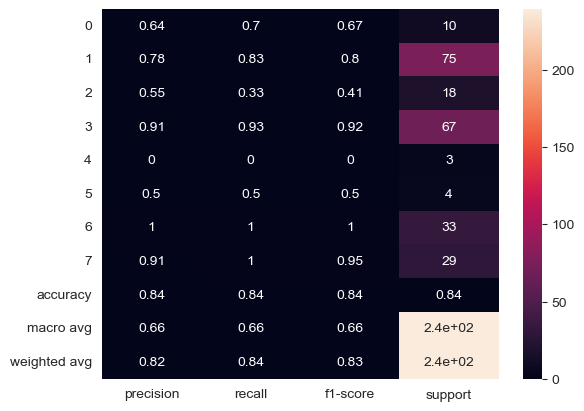

In [132]:
clsf_repo= classification_report(y_test, best_rfc_pred, output_dict= True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot= True)

In [133]:
from sklearn.metrics import roc_auc_score

In [135]:
y_prob= best_rfc_grid.fit(x_train, y_train).predict_proba(x_test)

macro_roc_auc_ovo= roc_auc_score(y_test, y_prob, multi_class= "ovo", average= "macro")
weighted_roc_auc_ovo= roc_auc_score(y_test, y_prob, multi_class= "ovo", average= "weighted")
macro_roc_auc_ovr= roc_auc_score(y_test, y_prob, multi_class= "ovr", average= "macro")
weighted_roc_auc_ovr= roc_auc_score(y_test, y_prob, multi_class= "ovr", average= "weighted")

print("One-vs-One Roc Auc Scores:\n{:.6f} (macro),\n{:.6f}"
      "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("="*40)
print("One-vs-Rest Auc Scores:\n{:.6f} (macro),\n{:.6f}"
      "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One Roc Auc Scores:
0.930825 (macro),
0.945601(weighted by prevalence)
One-vs-Rest Auc Scores:
0.941960 (macro),
0.967561(weighted by prevalence)


### SAVING MODEL

In [136]:
import joblib

In [137]:
joblib.dump(best_rfc_grid.best_estimator_, 'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']